# 1. Data Cleaning

## Twee gegevensreeksen inlezen en samenvoegen


In [86]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [87]:
#read the datasets 
df = pd.read_csv("steps.csv", sep=";")
df1 = pd.read_csv("survey.csv", sep=',')

#merge the datasets 
Data = pd.merge(df1, df, how='right', on='id')

Data.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
Data.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,929.000000,929.000000,929.000000,928.000000,927.000000,24.000000,243.000000,278.000000,296.000000,354.000000,...,83.000000,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0
mean,465.000000,2.342304,2.530678,171.668103,72.833873,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,...,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN
std,268.323499,1.226129,1.274491,9.080235,25.902717,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,...,6923.674171,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN
min,1.000000,1.000000,1.000000,145.000000,6.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,726.000000,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN
25%,233.000000,1.000000,1.000000,165.000000,61.000000,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,...,3538.000000,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN
50%,465.000000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,5386.000000,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN
75%,697.000000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,...,11811.000000,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN
max,929.000000,11.000000,5.000000,195.000000,700.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN


## De gegevens opschonen: onmogelijke waarden verwijderen  

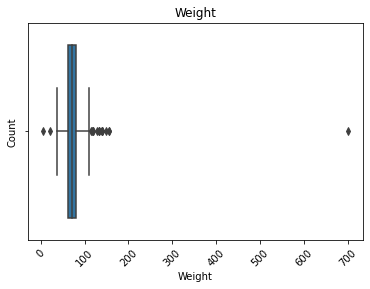

In [89]:
sns.boxplot(x="weight", data=Data)
plt.title("Weight")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [90]:
Data["weight"]=Data["weight"].replace(700,np.nan)

In [91]:
Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Data columns (total 337 columns):
 #    Column       Dtype  
---   ------       -----  
 0    id           int64  
 1    city         object 
 2    gender       object 
 3    age          object 
 4    hh_size      int64  
 5    education    int64  
 6    education_1  object 
 7    height       float64
 8    weight       float64
 9    20-6-2013    float64
 10   21-6-2013    float64
 11   22-6-2013    float64
 12   23-6-2013    float64
 13   24-6-2013    float64
 14   25-6-2013    float64
 15   26-6-2013    float64
 16   27-6-2013    float64
 17   28-6-2013    float64
 18   29-6-2013    float64
 19   30-6-2013    float64
 20   1-7-2013     float64
 21   2-7-2013     float64
 22   3-7-2013     float64
 23   4-7-2013     float64
 24   5-7-2013     float64
 25   6-7-2013     float64
 26   7-7-2013     float64
 27   8-7-2013     float64
 28   9-7-2013     float64
 29   10-7-2013    float64
 30   11-7-2013    float64
 31

## Variabele gemiddelde stappen per deelnemer 


In [92]:
Data["mean"]=Data.iloc[:,9:336].mean(axis=1)
Data.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [93]:
Data['BMI']=Data["weight"]/(Data["height"]/100)**2
Data.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean,BMI
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212,30.930438
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313,23.765432
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730,25.617284
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000,25.249337
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630,21.872423


In [95]:
Data_sub = Data.loc[:,'id':"weight"]
Data_sub2 = Data.loc[:,'mean':"BMI"]
Data = pd.concat([Data_sub,Data_sub2],axis=1)
Data = Data.drop(columns=["hh_size"])
Data.head()


,id,city,gender,age,education,education_1,height,weight,mean,BMI
0,1,Bordeaux,Male,25-34,4,Master or doctorate,178.0,98.0,10205.521212,30.930438
1,2,Lille,Male,35-44,3,Bachelor,180.0,77.0,5687.423313,23.765432
2,3,Montpellier,Male,25-34,2,Master or doctorate,180.0,83.0,8301.729730,25.617284
3,4,Lyon,Male,<25,1,Bachelor,178.0,80.0,3633.200000,25.249337
4,5,Montpellier,Female,25-34,4,Bachelor,167.0,61.0,5312.129630,21.872423


# 3. Verkennende gegevensanalyse

In [96]:
Data=Data[Data["mean"]<75000]
print('Median = '+str(Data["mean"].median()))
print('Mean = '+str(Data["mean"].mean()))
print('St Dev. = '+str(Data["mean"].std()))

Median = 6244.931601731601
Mean = 6825.928380530858
St Dev. = 3696.491961554726


### Scatterplot matrix van de numerieke variabelen 


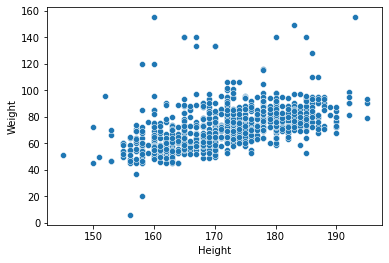

In [97]:
Scatterplot = sns.scatterplot(x= "height", y="weight", data=Data)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

### Correlatiematrix van de numerieke variabelen


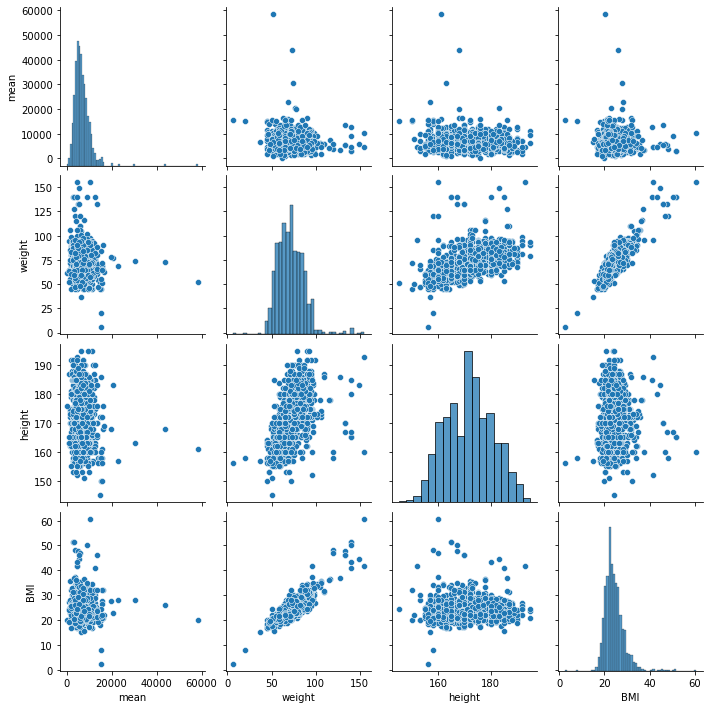

In [98]:
Data_sub = Data[["mean", "weight", "height", "BMI"]]
sns.pairplot(Data_sub)
plt.show()

In [99]:
corr = Data_sub.corr()
corr

,mean,weight,height,BMI
mean,1.000000,-0.085936,-0.097515,-0.045570
weight,-0.085936,1.000000,0.514950,0.871191
height,-0.097515,0.514950,1.000000,0.038336
BMI,-0.045570,0.871191,0.038336,1.000000


BMI is berekend op basis van het gewicht en hoogte waardoor het niet raar is dat er tussen deze variabelen een verband zit. Daarnaast zit er geen verband tussen het gemiddeld aantal stappen en hoogte of gewicht

# 4. Voorspellend model

### Lineair model

Een Lineaire regressie is een proces waarbij er gekeken wordt naar een lineair verband tussen twee grootheden. Één van de grootheden is de onafhankelijke grootheid die op de x-as van het diagram weergegeven wordt, de andere grootheid wordt bepaald door deze onafhankelijke grootheid en wordt de afhankelijke grootheid genoemd. 



### Dummy variabelen maken voor de categorische variabelen

In [100]:
Data.head()

,id,city,gender,age,education,education_1,height,weight,mean,BMI
0,1,Bordeaux,Male,25-34,4,Master or doctorate,178.0,98.0,10205.521212,30.930438
1,2,Lille,Male,35-44,3,Bachelor,180.0,77.0,5687.423313,23.765432
2,3,Montpellier,Male,25-34,2,Master or doctorate,180.0,83.0,8301.729730,25.617284
3,4,Lyon,Male,<25,1,Bachelor,178.0,80.0,3633.200000,25.249337
4,5,Montpellier,Female,25-34,4,Bachelor,167.0,61.0,5312.129630,21.872423


In [101]:
corr = Data.corr()
corr["mean"].sort_values(ascending=False)

mean         1.000000
education    0.041107
id           0.017723
BMI         -0.045570
weight      -0.085936
height      -0.097515
Name: mean, dtype: float64

In [102]:
Data_select = Data.drop(columns=["id","education","BMI"])
Data_select.head()

,city,gender,age,education_1,height,weight,mean
0,Bordeaux,Male,25-34,Master or doctorate,178.0,98.0,10205.521212
1,Lille,Male,35-44,Bachelor,180.0,77.0,5687.423313
2,Montpellier,Male,25-34,Master or doctorate,180.0,83.0,8301.729730
3,Lyon,Male,<25,Bachelor,178.0,80.0,3633.200000
4,Montpellier,Female,25-34,Bachelor,167.0,61.0,5312.129630


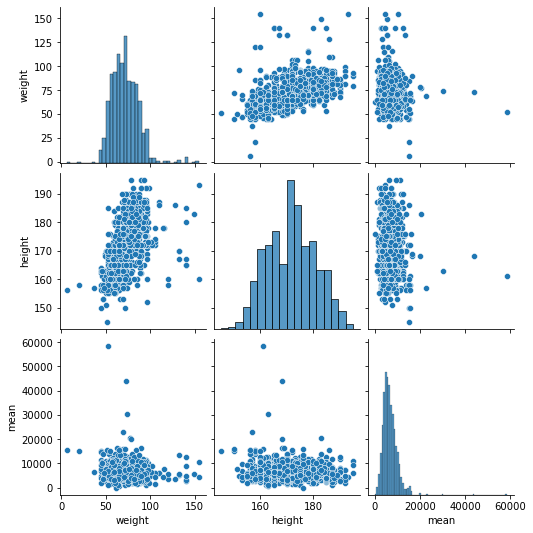

In [104]:
sns.pairplot(Data_select[["weight","height", "mean"]])
plt.show()

In [108]:
Data = pd.get_dummies(Data_select,columns=["city", "gender", "age","education_1" ],drop_first= True)
Data.head()

,height,weight,mean,city_Lille,city_Lyon,city_Montpellier,gender_Male,age_35-44,age_45-54,age_55-64,age_65+,age_<25,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational
0,178.0,98.0,10205.521212,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,180.0,77.0,5687.423313,1,0,0,1,1,0,0,0,0,0,0,0,0,0
2,180.0,83.0,8301.729730,0,0,1,1,0,0,0,0,0,0,1,0,0,0
3,178.0,80.0,3633.200000,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,167.0,61.0,5312.129630,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [109]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 0 to 928
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   height                           923 non-null    float64
 1   weight                           921 non-null    float64
 2   mean                             924 non-null    float64
 3   city_Lille                       924 non-null    uint8  
 4   city_Lyon                        924 non-null    uint8  
 5   city_Montpellier                 924 non-null    uint8  
 6   gender_Male                      924 non-null    uint8  
 7   age_35-44                        924 non-null    uint8  
 8   age_45-54                        924 non-null    uint8  
 9   age_55-64                        924 non-null    uint8  
 10  age_65+                          924 non-null    uint8  
 11  age_<25                          924 non-null    uint8  
 12  education_1_High schoo

In [110]:
Data=Data_dummies.dropna()

# 5. Evaluatie 

## Train/test 

In [118]:
from sklearn.model_selection import train_test_split #this is the function we need to split the data

x = Data[['mean']] 
y = Data['city_Lille']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 23)

In [119]:
lm = LinearRegression() #create a new (empty model)

lm = lm.fit(x_train, y_train) #fit the model WITH THE TRAIN DATA ONLY
lm.intercept_

0.3819907262462933

In [113]:
y_test_p= lm.predict(x_test)

In [114]:
r2_score(y_test, y_test_p)

-0.04102915796650053

In [115]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.5071315569293123

Uitkomsten: 
Als y: 
- education                 --> r2 = -0.001204798143081387
- height                    --> r2 = 0.01884496088964238
- weight                    --> r2 = 0.00019195095590263112
- mean                      --> r2 = 1.0
- BMI                       --> r2 = -0.006546919919030003
- City_Lille                --> r2 = -0.04102915796650053
- City_Lyon                 --> r2 = -0.0025532190564727664
- City_Montpellier          --> r2 = -3.8123389269895114e-06
- Gender_Male               --> r2 = 0.0017193846659430134
- age_35-44                 --> r2 = -0.0004684622981172559
- age_45-54                 --> r2 = -0.024689005368126793
- age_55-64                 --> r2 = -0.0126992396725647
- age_65+                   --> r2 = -0.006339113250525497
- age_<25                   --> r2 = -0.006345677581921949
- education_1_High school   --> r2 = 0.004844864131631654
- education_1_Master or doctorate --> r2 = -0.0077833308904387
- education_1_No degree     --> r2 = -0.0036363636363636598
- education_1_Primary       --> r2 = -0.004011047987975358
- education_1_Vocational    --> r2 = -0.026519032865602865

De R2 van 'City_Lille' heeft de uitkomst die het dichts tegen de -1 aan ligt. Dit wil zeggen dat deze variabelen het meest invloed heeft op het gemiddeld aantal stappen van een persoon.  

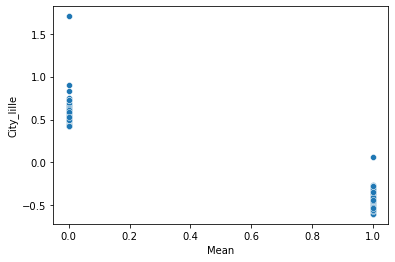

In [116]:
e=y_test_p-y_test
sns.scatterplot(x=y_test, y=e)
plt.xlabel('Mean')
plt.ylabel('City_lille')
plt.show()